## Compute Pearson Correlation Coefficients

Correlation coefficients between accuracy drop and entropy were computed for each batch size. As the batch size increased, the correlation coefficients decreased (see graph below). All of the coefficients were above 0 and remained above 0.3 for the five smallest batch sizes. The coefficient was also computed over all of the samples and came out to be about 0.51.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [35]:
batch_sizes = [2 ** x for x in range(0, 8)]

In [36]:
# compute the correlation coefficient 
# between accuracy drop and entropy for each batch size
per_batch_coef = []
for batch_size in batch_sizes:
    with open("./out/amazon_ref/accuracy_%s.json" % batch_size) as file:
        accuracy = json.load(file)
    with open("./out/amazon_ref/entropies_%s.json" % batch_size) as file:
        entropy = json.load(file)
    x = 0.8145204027556969 - np.array(accuracy["0"] + accuracy["1"] + accuracy["2"])
    y = np.array(entropy["0"] + entropy["1"] + entropy["2"])
    per_batch_coef.append(np.corrcoef(x, y)[0, 1])
    

In [37]:
per_batch_coef

[0.5831682875654718,
 0.47075274526981553,
 0.35458015155388983,
 0.4723172207323472,
 0.3706195877529314,
 0.2905271555250411,
 0.26261800461264806,
 0.18239668550720312]

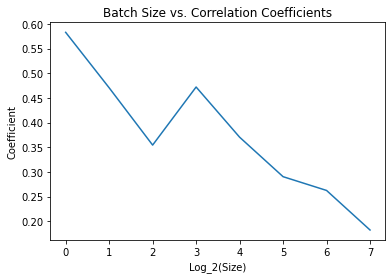

In [38]:
plt.plot(range(0, 8), per_batch_coef)
plt.title("Batch Size vs. Correlation Coefficients")
plt.xticks(range(0, 8))
plt.xlabel("Log_2(Size)")
plt.ylabel("Coefficient")
plt.show()

In [40]:
# compute the correlation coefficent over samples from all batch sizes
_accuracy = []
_entropy = []
for batch_size in batch_sizes:
    with open("./out/amazon_ref/accuracy_%s.json" % batch_size) as file:
        accuracy = json.load(file)
    with open("./out/amazon_ref/entropies_%s.json" % batch_size) as file:
        entropy = json.load(file)
    _accuracy += accuracy["0"] + accuracy["1"] + accuracy["2"]
    _entropy += entropy["0"] + entropy["1"] + entropy["2"]

x = 0.8145204027556969 - np.array(_accuracy)
y = np.array(_entropy)
np.corrcoef(x, y)[0, 1]

0.5079886285489501

## Confusion

TPR = TP / (TP + FN)

FPR = FP / (FP + TN)

In [49]:
with open("./out/amazon_ref/confusion.json") as file:
    confusion = json.load(file)
confusion

{'1': {'fpr': [0.2652134423251589], 'tpr': [0.8588957055214724]},
 '2': {'fpr': [0.25190839694656486], 'tpr': [0.7085927770859277]},
 '4': {'fpr': [0.38877755511022044], 'tpr': [0.9013605442176871]},
 '8': {'fpr': [0.4911504424778761], 'tpr': [0.9764705882352941]},
 '16': {'fpr': [0.8055555555555556], 'tpr': [0.9887640449438202]},
 '32': {'fpr': [0.9807692307692307], 'tpr': [1.0]},
 '64': {'fpr': [1.0], 'tpr': [1.0]},
 '128': {'fpr': [1.0], 'tpr': [1.0]}}

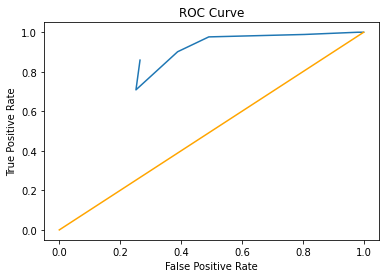

In [67]:
plt.plot([confusion[str(2**x)]["fpr"][0] for x in range(0, 8)], [confusion[str(2**x)]["tpr"][0] for x in range(0, 8)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
x = np.linspace(0, 1, 10000)
plt.plot(x, x, color="orange")
plt.show()

## Plot Evaluation Time

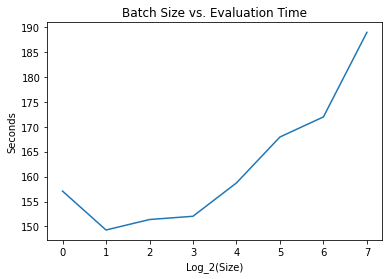

In [48]:
with open("./out/amazon_ref/time_per_batch.json") as file:
    time_b = json.load(file)
plt.plot(range(0, 8), [time_b[str(2 ** x)] for x in range(0, 8)])
plt.xlabel("Log_2(Size)")
plt.ylabel("Seconds")
plt.title("Batch Size vs. Evaluation Time")
plt.show()